# **PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS - NÚCLEO DE EDUCAÇÃO A DISTÂNCIA**

### Pós-graduação Lato Sensu em Ciência de Dados e Big Data


# Clusterização do índice de vacinação no estado do Maranhão com base em indicadores Sócio-econômicos


### Aluno: José de Ribamar Mendes Farias

## 4. Análise e Exploração dos Dados

Análise exploratória de dados (AED) é uma etapa muito importante em ciência de dados para analisar e investigar conjuntos de dados e resumir suas principais características usando métodos de visualização de dados. É essencial que o cientista de dados seja capaz de entender a natureza dos dados.

Ela permite determinar a melhor forma de controlar as fontes de dados para obter as respostas que você precisa, tornando mais fácil descobrir padrões, detectar anomalias, testar hipóteses ou verificar suposições.

fonte: https://www.ibm.com/br-pt/cloud/learn/exploratory-data-analysis

Nesta etapa usaremos o arquivo RegVacinaMA_TratDados.csv, criado no notebook TCC_PUC_01 - Vacina_MA - Tratamento de dados.ipynb

## 4.1 Bibliotecas

In [1]:
import pandas as pd
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4.2 Carregando a planilha de trabalho

In [2]:
#Carregando a planilha registros da vacinação Covid-19/MA
df_aed = pd.read_csv('RegVacinaMA_TratDados.csv', encoding='utf-8', sep=',', header=0, low_memory=False)

In [3]:
# Examinando o dataset
df_aed.columns = df_aed.columns.str.replace(' ', '')
df_aed.drop(columns=['Unnamed:0'], axis=1, inplace=True)
df_aed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737004 entries, 0 to 737003
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   paciente_id            737004 non-null  object 
 1   paciente_idade         737004 non-null  float64
 2   paciente_dt_nasc       737004 non-null  object 
 3   paciente_sexo          737004 non-null  object 
 4   paciente_raca          737004 non-null  object 
 5   paciente_nm_municp     737004 non-null  object 
 6   paciente_categoria     736696 non-null  object 
 7   vacina_nm_municp       737004 non-null  object 
 8   vacina_dt_aplic        737004 non-null  object 
 9   vacina_desc_dose       737004 non-null  object 
 10  vacina_nome            737004 non-null  object 
 11  municp_populacao       737004 non-null  int64  
 12  municp_codigo          737004 non-null  int64  
 13  municp_qtdevac         737004 non-null  int64  
 14  municp_cobert          737004 non-nu

##### Recuperando o dataset dos registros de vacinação + indicadores.

##### São 737.004 registros de pacientes que receberam a 1ª dose mas não retornaram, em 2021, para receber a 2ª dose.

## 4.3 Análise Univariada

## 4.3.1 Variáveis Qualitativas

### 4.3.1.1 Análise da faixa etária dos pacientes

In [4]:
df_aed['paciente_class_idade'] = pd.cut(df_aed['paciente_idade'],
                                      bins=[11.0, 19.0, 29.0, 39.0, 49.0, 59.0, 69.0, 79.0, 129.0],
                                      labels=['12-18 anos','19-29 anos','30-39 anos','40-49 anos','50-59 anos','60-69 anos',
                                              '70-79 anos','80 ou mais'])

In [5]:
fxet = df_aed.groupby(['paciente_class_idade']).agg({'paciente_class_idade': ['count']}).T
fxet

,paciente_class_idade,12-18 anos,19-29 anos,30-39 anos,40-49 anos,50-59 anos,60-69 anos,70-79 anos,80 ou mais
paciente_class_idade,count,212612,181013,143061,94014,55524,28165,13329,9286


In [6]:
fe = df_aed.paciente_class_idade.value_counts()
tfe =df_aed.paciente_class_idade.count()
round(fe/tfe*100,2)

12-18 anos    28.85
19-29 anos    24.56
30-39 anos    19.41
40-49 anos    12.76
50-59 anos     7.53
60-69 anos     3.82
70-79 anos     1.81
80 ou mais     1.26
Name: paciente_class_idade, dtype: float64

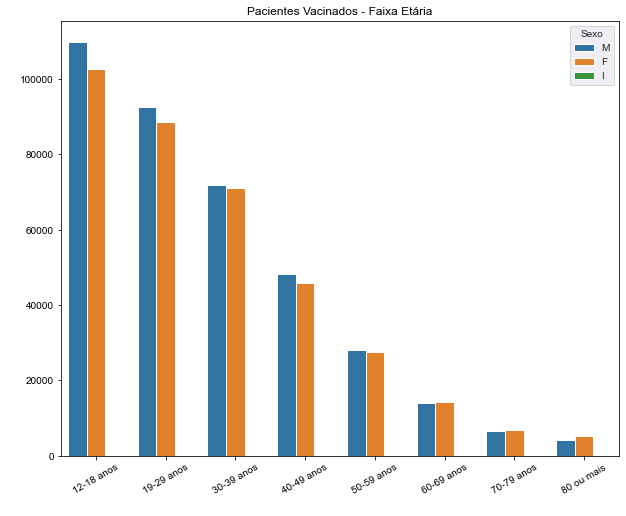

In [7]:
# Visualizando a faixa etária dos pacientes

plt.subplots(figsize=(10,8))
sns.set_style('darkgrid')
plot = sns.countplot(x='paciente_class_idade', hue='paciente_sexo', data=df_aed)

plt.title('Pacientes Vacinados - Faixa Etária')
plt.ylabel(' ')
plot.set_xlabel(' ')
plt.xticks(rotation=30)
plt.legend(title='Sexo', loc=1)
plt.show()

Observações:

- A faixa etária dos 12-18 anos predomina no grupo não imunizados com 30,97% do grupo 
- Os homens deste grupo são mais numerosos na maioria das faixas de idade

In [8]:
M100 = df_aed.query('paciente_idade > 100')

In [9]:
r = M100.paciente_idade.value_counts().sum()
print(str(r)+' pacientes com idade acima dos 100 anos')     

280 pacientes com idade acima dos 100 anos


### 4.3.1.2 Analisando o sexo declarado

In [10]:
df_aed.paciente_sexo.value_counts()

M    375260
F    361743
I         1
Name: paciente_sexo, dtype: int64

Como os dados só apresentam 1 pacientes registrado com sexo indefinido (I), optou-se pela exclusão do registro.

In [11]:
df_aed = df_aed.query('paciente_sexo.str.contains("I") == False', engine='python')

In [12]:
df_aed.paciente_sexo.value_counts()

M    375260
F    361743
Name: paciente_sexo, dtype: int64

In [13]:
mf = df_aed.paciente_sexo.value_counts()
tmf = df_aed.paciente_sexo.count()
round(mf/tmf*100,2)

M    50.92
F    49.08
Name: paciente_sexo, dtype: float64

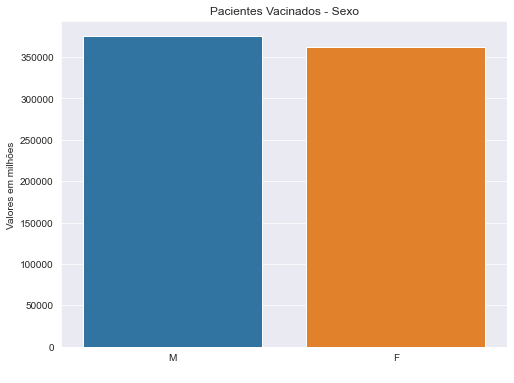

In [14]:
# Visualizando o sexo dos pacientes

plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')
plot = sns.countplot(x='paciente_sexo', data=df_aed)

plt.title('Pacientes Vacinados - Sexo')
plt.ylabel('Valores em milhões ')
plot.set_xlabel(' ')
#plt.xticks(rotation=30)
#plt.legend(title='Sexo')
plt.show()

Os homens superaram as mulheres por 50,92% nos não imunizados

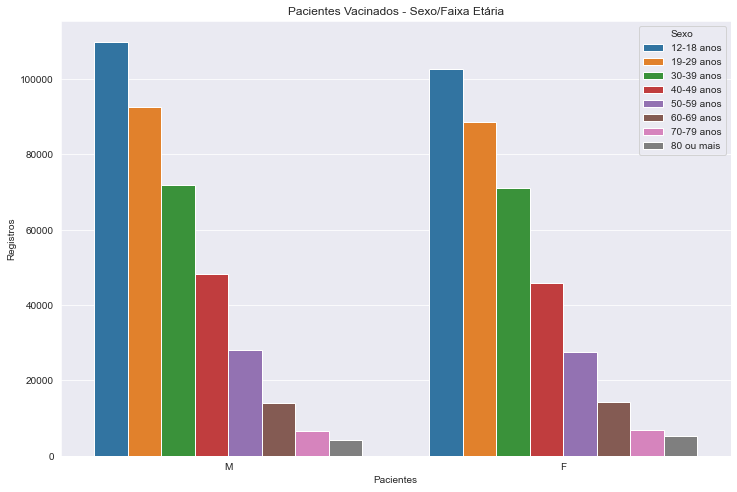

In [15]:
# Visualizando o sexo por faixa etária dos pacientes

plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
plot = sns.countplot(x='paciente_sexo', hue='paciente_class_idade', data=df_aed)

plt.title('Pacientes Vacinados - Sexo/Faixa Etária')
plt.ylabel('Registros')
plot.set_xlabel('Pacientes')
#plt.xticks(rotation=30)
plt.legend(title='Sexo', loc=1)
plt.show()

In [16]:
df_aed.groupby(['paciente_class_idade']) ['paciente_sexo'].value_counts()

paciente_class_idade  paciente_sexo
12-18 anos            M                109965
                      F                102647
19-29 anos            M                 92508
                      F                 88505
30-39 anos            M                 71876
                      F                 71185
40-49 anos            M                 48202
                      F                 45811
50-59 anos            M                 28011
                      F                 27513
60-69 anos            F                 14173
                      M                 13992
70-79 anos            F                  6769
                      M                  6560
80 ou mais            F                  5140
                      M                  4146
Name: paciente_sexo, dtype: int64

A partir dos 60 anos as mulheres são, ligeiramente, mais numerosas

### 4.3.1.3 Analisando o atributo categoria¶

A aplicação da vacina obedeceu as normas estabelecidas pelo PNI (Programa Nacional de Imunização). 

Inicialmente, algumas categorias como trabalhadores da saúde, povos indígenas, comorbidades, puérperas etc tiveram as prioridade na aplicação das doses.

In [17]:
pc = df_aed.paciente_categoria.value_counts()
tpc = df_aed.paciente_categoria.count()
round(pc/tpc*100,2)

Faixa Etária                                       89.62
Comorbidades                                        2.47
Trabalhadores da Educação                           1.73
Povos e Comunidades Tradicionais                    1.50
Trabalhadores de Saúde                              1.48
Trabalhadores Industriais                           0.58
Povos Indígenas                                     0.54
Gestantes                                           0.51
População Privada de Liberdade                      0.30
Forças de Segurança e Salvamento                    0.23
Trabalhadores de Transporte                         0.21
Pessoas com Deficiência                             0.20
Outros                                              0.16
Pessoas de 60 anos ou mais institucionalizadas      0.16
Trabalhadores de Limpeza Urbana                     0.11
Puérperas                                           0.10
Trabalhadores Portuários                            0.04
Funcionário do Sistema de Priva

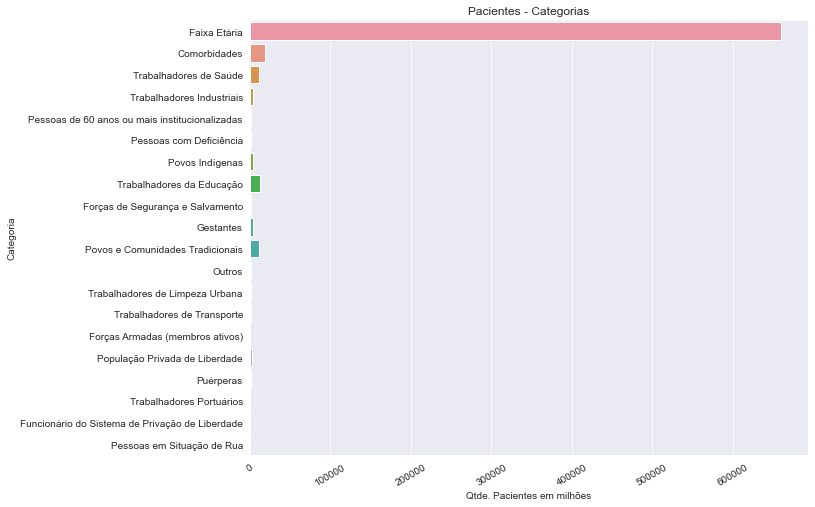

In [18]:
# Visualizando a categoria dos pacientes

plt.subplots(figsize=(10,8))
sns.set_style('darkgrid')
plot = sns.countplot(y='paciente_categoria', data=df_aed)

plt.title('Pacientes - Categorias')
plt.ylabel('Categoria')
plot.set_xlabel('Qtde. Pacientes em milhões')
plt.xticks(rotation=30)
#plt.legend(title='Categorias')
plt.show()

Observamos que a maioria dos não imunizados são da categoria faixa etária (89,62%), seguidos dos pacientes com comorbidade (2,47%), trabalhadores da educação (1,73%) e Povos e Comunidades Tradicionais (1,50%). 

### 4.3.1.4 Análise da raça declarada

In [19]:
df_aed.paciente_raca.value_counts()

AMARELA           265222
PARDA             247823
SEM INFORMACAO    124965
BRANCA             64931
PRETA              30346
INDIGENA            3716
Name: paciente_raca, dtype: int64

In [20]:
pr = df_aed.paciente_raca.value_counts()
tpr = df_aed.paciente_raca.count()
round(pr/tpr*100,2)

AMARELA           35.99
PARDA             33.63
SEM INFORMACAO    16.96
BRANCA             8.81
PRETA              4.12
INDIGENA           0.50
Name: paciente_raca, dtype: float64

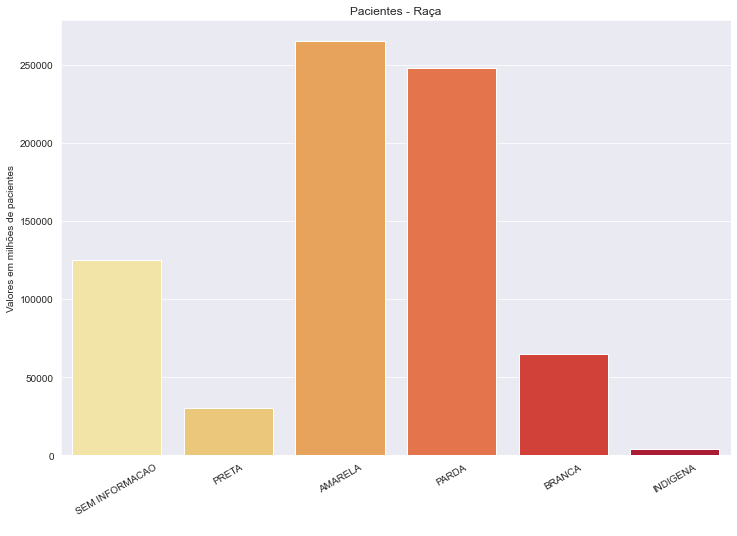

In [21]:
# Visualizando a raça dos pacientes

plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')

plot = sns.countplot(x='paciente_raca', data=df_aed, palette='YlOrRd')

plt.title('Pacientes - Raça')
plt.ylabel('Valores em milhões de pacientes')
plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title='Raça')
plt.show()

A população maranhense é predominantemente negra.

Estaria mais próximo da realidade se somamos pardos, pretos e boa parte dos sem informação. 

### 4.3.1.5 Análise da vacinação por mês

In [22]:
df_aed['vacina_dt_aplic'] = pd.to_datetime(df_aed['vacina_dt_aplic'], format='%Y/%m/%d')

In [23]:
df_aed.vacina_dt_aplic.dt.to_period('M')

0         2021-11
1         2021-08
2         2021-09
3         2021-11
4         2021-04
           ...   
736999    2021-08
737000    2021-09
737001    2021-04
737002    2021-07
737003    2021-08
Name: vacina_dt_aplic, Length: 737003, dtype: period[M]

In [24]:
df_aed['vacina_dose_mes'] = df_aed.vacina_dt_aplic.dt.to_period('M').astype(str)

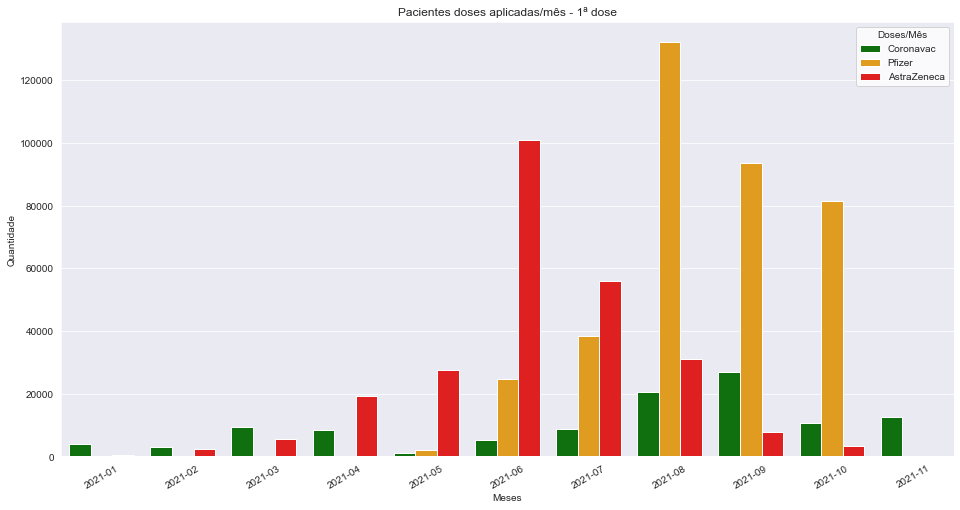

In [25]:
# Visualizando a aplicação das vacinas 

plt.subplots(figsize=(16,8))
sns.set_style('whitegrid')

cores=['green','orange','red']
plot = sns.countplot(x=df_aed.vacina_dose_mes.sort_values(), hue='vacina_nome', data=df_aed,  palette=cores)

plt.title('Pacientes doses aplicadas/mês - 1ª dose')
plt.ylabel('Quantidade')
plot.set_xlabel('Meses')
plt.xticks(rotation=30)
#plt.legend(labels=["Legend_Day1","Legend_Day2"], loc = 2, bbox_to_anchor = (1,1))
plt.legend(title='Doses/Mês', loc=1)
#plt.set_title(' ')
plt.show()

In [26]:
df_aed.vacina_dose_mes.value_counts()

2021-08    183503
2021-06    131027
2021-09    128310
2021-07    102814
2021-10     95567
2021-05     30743
2021-04     27754
2021-03     15003
2021-11     12522
2021-02      5415
2021-01      4345
Name: vacina_dose_mes, dtype: int64

Observações:

- Os meses com maior concentração de vacinações foram Agosto, Junho, Setembro e Julho/21.
- A Coronavac aparece isolada em Novembro porque foram retiradas as vacinações da Pfizer e AstraZeneca 

In [27]:
df_aed.vacina_nome.value_counts()

Pfizer         372275
AstraZeneca    254036
Coronavac      110692
Name: vacina_nome, dtype: int64

A Pfizer for a vacina mais administrada nos pacientes deste grupo.

## 4.3.2 Variáveis Quantitativas

### 4.3.2.1 Análise da idade dos pacientes

In [28]:
df_aed.paciente_idade.describe()

count    737003.000000
mean         31.598502
std          16.313271
min          12.000000
25%          18.000000
50%          28.000000
75%          41.000000
max         128.000000
Name: paciente_idade, dtype: float64

In [29]:
imax = df_aed.query('paciente_idade == 128')

In [30]:
imax.loc[:,['paciente_idade','paciente_dt_nasc','paciente_sexo','paciente_raca','paciente_nm_municp','vacina_dt_aplic',
            'vacina_nome','vacina_nm_municp']]


,paciente_idade,paciente_dt_nasc,paciente_sexo,paciente_raca,paciente_nm_municp,vacina_dt_aplic,vacina_nome,vacina_nm_municp
622461,128.0,1893-03-12,M,AMARELA,ROSARIO,2021-03-17,Coronavac,ROSARIO


A pessoa mais idosa deste grupo tinha 128 anos.

### 4.3.2.2 Análise das indicadores socioeconômicos dos municípios

### 4.3.2.2.1 Índice IDHM

In [31]:
# Aplicando a classificação no índice IDHM
#
# A classifição padrão do indice IDHM se divide em 5 faixas de desenvolvimento (entre 0 e 1):
# {Muito alto  : 0,800 - 1,000
#  Alto        : 0,700 - 0,799
#  Médio       : 0,600 - 0,699
#  Baixo       : 0,500 - 0,599
#  Muito Baixo : 0,000 - 0,499}

# Criando atributo class para os índices IDHM
df_aed['municp_idhm_class'] = pd.cut(df_aed['municp_idhm'], bins=[0,0.5,0.6,0.7,0.8,1],
                                                    labels=['Muito Baixo','Baixo','Médio','Alto','Muito Alto'])
df_aed['municp_idhm_class_educ'] = pd.cut(df_aed['municp_idhm_educ'], bins=[0,0.5,0.6,0.7,0.8,1],
                                                    labels=['Muito Baixo','Baixo','Médio','Alto','Muito Alto'])
df_aed['municp_idhm_class_longev'] = pd.cut(df_aed['municp_idhm_longev'], bins=[0,0.5,0.6,0.7,0.8,1],
                                                    labels=['Muito Baixo','Baixo','Médio','Alto','Muito Alto'])
df_aed['municp_idhm_class_renda'] = pd.cut(df_aed['municp_idhm_renda'], bins=[0,0.5,0.6,0.7,0.8,1],
                                                    labels=['Muito Baixo','Baixo','Médio','Alto','Muito Alto'])

### 4.3.2.2.2 Indicadores de educação

In [32]:
#df_aed.municp_idhm_educ.describe()
df_aed[['municp_idhm_educ','municp_tx_analf','municp_niv_escol_pop']].describe()

,municp_idhm_educ,municp_tx_analf,municp_niv_escol_pop
count,737003.000000,737003.000000,737003.000000
mean,0.557906,22.843686,0.435874
std,0.111330,10.706437,0.161220
min,0.286000,4.920000,0.154000
25%,0.475000,16.180000,0.311000
50%,0.536000,24.160000,0.379000
75%,0.615000,31.980000,0.488000
max,0.752000,43.530000,0.735000


A taxa de analfabetismo do município precisa ser dividida por 100 para estar na mesma unidade dos índices IDHM

In [33]:
df_aed['municp_tx_analf'] = df_aed['municp_tx_analf'] / 100

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


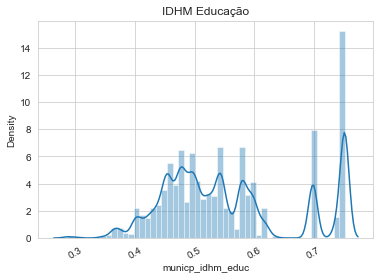

In [34]:
# Análise univariada IDHM Educação

#plt.subplots(figsize=(8,6))
sns.distplot(df_aed['municp_idhm_educ'])

plt.title('IDHM Educação')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

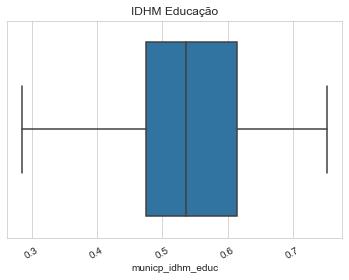

In [35]:
# Análise univariada IDHM Educação

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_idhm_educ'])


plt.title('IDHM Educação')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


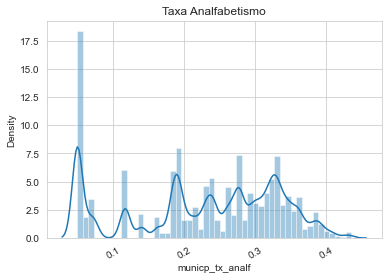

In [36]:
# Análise univariada taxa analfabetismo

#plt.subplots(figsize=(10,8))
sns.distplot(df_aed['municp_tx_analf'])

plt.title('Taxa Analfabetismo')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

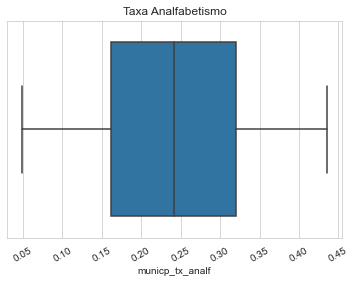

In [37]:
# Análise univariada taxa analfabetismo

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_tx_analf'])


plt.title('Taxa Analfabetismo')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


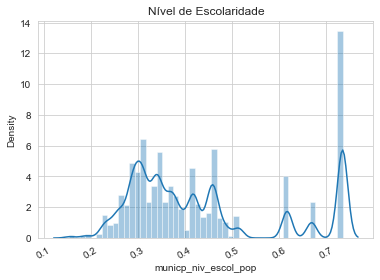

In [38]:
# Análise univariada taxa analfabetismo

#plt.subplots(figsize=(10,8))
sns.distplot(df_aed['municp_niv_escol_pop'])

plt.title('Nível de Escolaridade')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

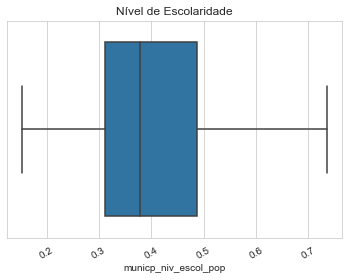

In [39]:
# Análise univariada taxa analfabetismo

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_niv_escol_pop'])


plt.title('Nível de Escolaridade')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

### 4.4.2.3 Indicadores de saúde

In [40]:
df_aed[['municp_idhm_longev','municp_mort_inf','municp_domic_luz','municp_domic_agua&esg']].describe()

,municp_idhm_longev,municp_mort_inf,municp_domic_luz,municp_domic_agua&esg
count,737003.000000,737003.000000,737003.000000,737003.000000
mean,0.761193,27.550102,96.181463,23.179646
std,0.035149,6.741804,4.880339,15.915259
min,0.677000,18.100000,57.490000,1.940000
25%,0.737000,21.300000,95.270000,7.430000
50%,0.758000,27.800000,97.570000,18.250000
75%,0.790000,32.000000,99.700000,34.300000
max,0.813000,45.300000,99.930000,73.010000


Os indicadores de condições de moradia do município precisam ser divididos por 100 para ficar na mesma unidade dos índices IDHM

In [41]:
# Verificando os indicadores socioeconômicos de saúde
df_aed['municp_mort_inf'] = df_aed['municp_mort_inf'] / 100
df_aed['municp_domic_agua'] = df_aed['municp_domic_agua'] / 100
df_aed['municp_domic_luz'] = df_aed['municp_domic_luz'] / 100
df_aed['municp_domic_agua&esg'] = df_aed['municp_domic_agua&esg'] / 100

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


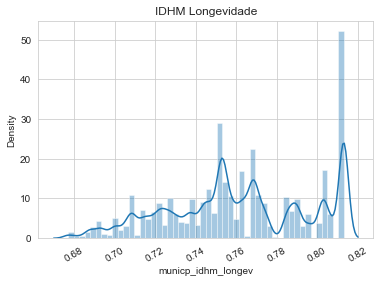

In [42]:
# Análise univariada IDHM longevidade

#plt.subplots(figsize=(10,8))
sns.distplot(df_aed['municp_idhm_longev'])

plt.title('IDHM Longevidade')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

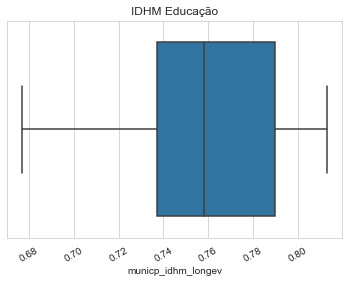

In [43]:
# Análise univariada IDHM longevidade

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_idhm_longev'])


plt.title('IDHM Educação')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


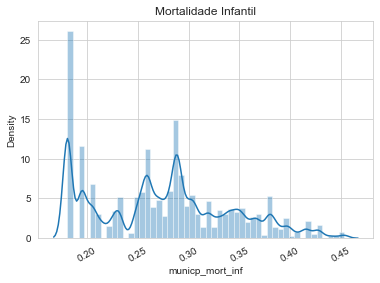

In [44]:
# Análise univariada mortabilidade infantil

#plt.subplots(figsize=(10,8))
sns.distplot(df_aed['municp_mort_inf'])

plt.title('Mortalidade Infantil')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

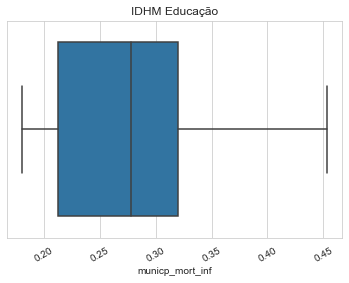

In [45]:
# Análise univariada mortabilidade iunivariada nfantil

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_mort_inf'])


plt.title('IDHM Educação')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


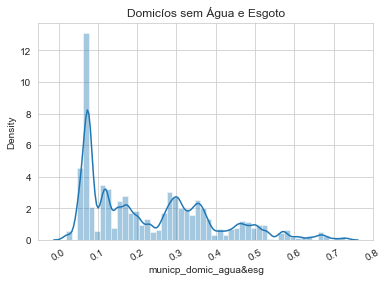

In [46]:
# Análise univariada domicíos com água e esgoto

#plt.subplots(figsize=(10,8))
sns.distplot(df_aed['municp_domic_agua&esg'])

plt.title('Domicíos sem Água e Esgoto')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

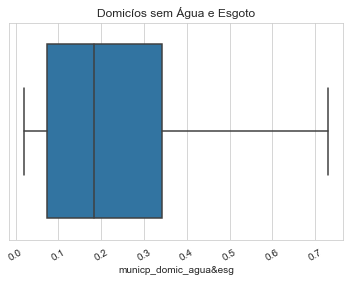

In [47]:
# Análise univariada domicíos com água e esgoto

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_domic_agua&esg'])


plt.title('Domicíos sem Água e Esgoto')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

### 4.4.2.4 Indicadores de renda

In [48]:
df_aed.municp_idhm_renda.describe()
df_aed[['municp_idhm_renda','municp_rend_pcap','municp_rend_med_ocup']].describe()

,municp_idhm_renda,municp_rend_pcap,municp_rend_med_ocup
count,737003.000000,737003.000000,737003.000000
mean,0.590240,364.898178,693.702958
std,0.084617,212.005949,367.498380
min,0.400000,96.250000,136.420000
25%,0.525000,210.300000,412.150000
50%,0.570000,277.190000,560.400000
75%,0.643000,438.560000,909.170000
max,0.741000,805.360000,1501.640000


Os indicadores de rendimentos da população municipal precisam ser divididos por 1000 combinar com os índices IDHM

In [49]:
# Verificando os indicadores socioeconômicos de renda
df_aed['municp_rend_med_ocup'] = df_aed['municp_rend_med_ocup'] / 1000
df_aed['municp_rend_pcap'] = df_aed['municp_rend_pcap'] / 1000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


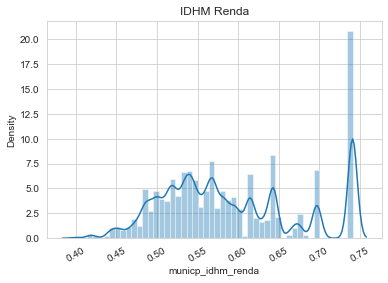

In [50]:
# Análise univariada IDHM renda

#plt.subplots(figsize=(10,8))
sns.distplot(df_aed['municp_idhm_renda'])

plt.title('IDHM Renda')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

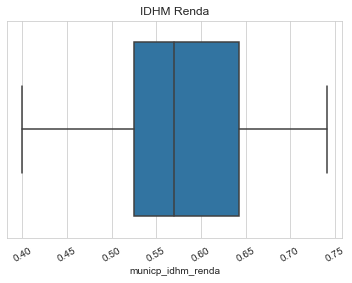

In [51]:
# Análise univariada IDHM renda

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_idhm_renda'])


plt.title('IDHM Renda')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


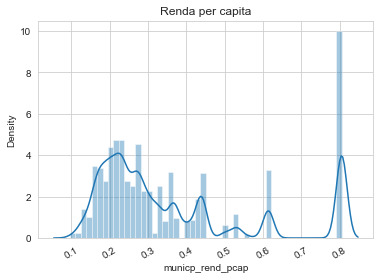

In [52]:
# Análise univariada IDHM renda

#plt.subplots(figsize=(10,8))
sns.distplot(df_aed['municp_rend_pcap'])

plt.title('Renda per capita')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

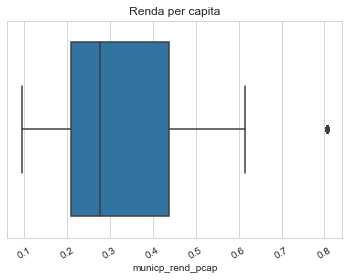

In [53]:
# Análise univariada IDHM renda

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_rend_pcap'])


plt.title('Renda per capita')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


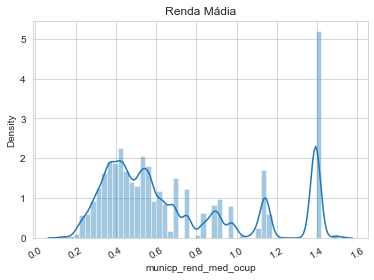

In [54]:
# Análise univariada IDHM renda

#plt.subplots(figsize=(10,8))
sns.distplot(df_aed['municp_rend_med_ocup'])

plt.title('Renda Mádia')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

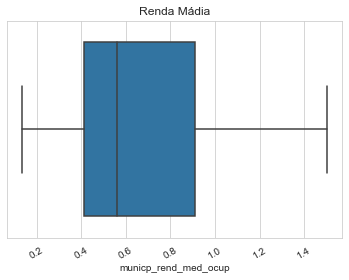

In [55]:
# Análise univariada IDHM renda

#plt.subplots(figsize=(8,6))
#plt.subplots(1,2)
sns.boxplot(x=df_aed['municp_rend_med_ocup'])


plt.title('Renda Mádia')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

## 4.4 Análises Bivariadas

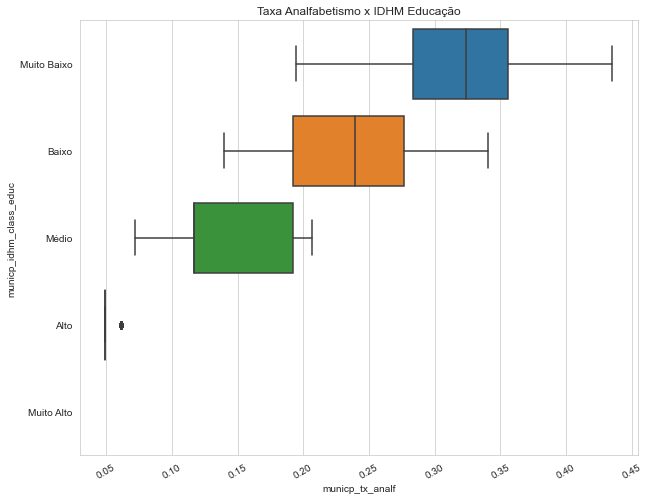

In [56]:
# Análise bivariada taxa analfabetismo x cobertura vacinal
plt.subplots(figsize=(10,8))

sns.boxplot(x=df_aed['municp_tx_analf'], y=df_aed['municp_idhm_class_educ'])

plt.title('Taxa Analfabetismo x IDHM Educação')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

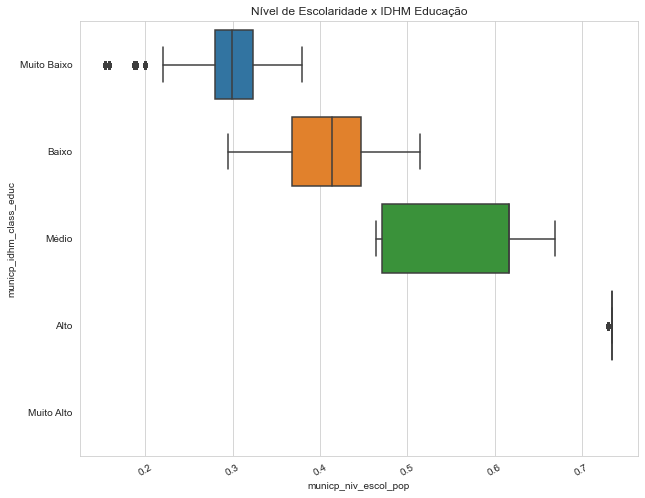

In [57]:
# Análise bivariada taxa analfabetismo x cobertura vacinal
plt.subplots(figsize=(10,8))

sns.boxplot(x=df_aed['municp_niv_escol_pop'], y=df_aed['municp_idhm_class_educ'])

plt.title('Nível de Escolaridade x IDHM Educação')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

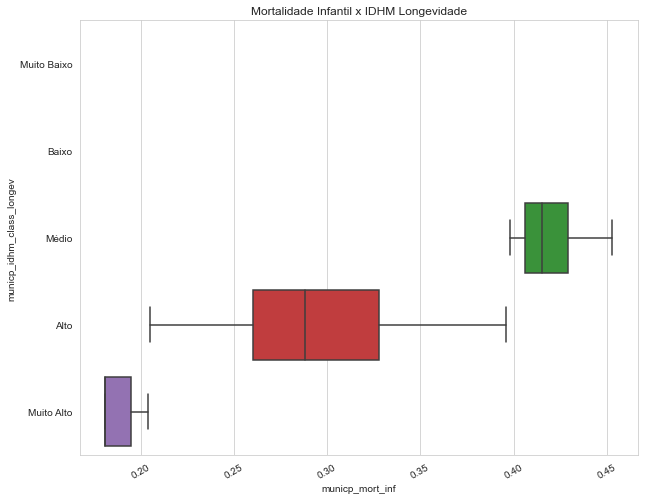

In [58]:
# Análise bivariada mortalidade infantil x cobertura vacinal
plt.subplots(figsize=(10,8))

sns.boxplot(x=df_aed['municp_mort_inf'], y=df_aed['municp_idhm_class_longev'])

plt.title('Mortalidade Infantil x IDHM Longevidade')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

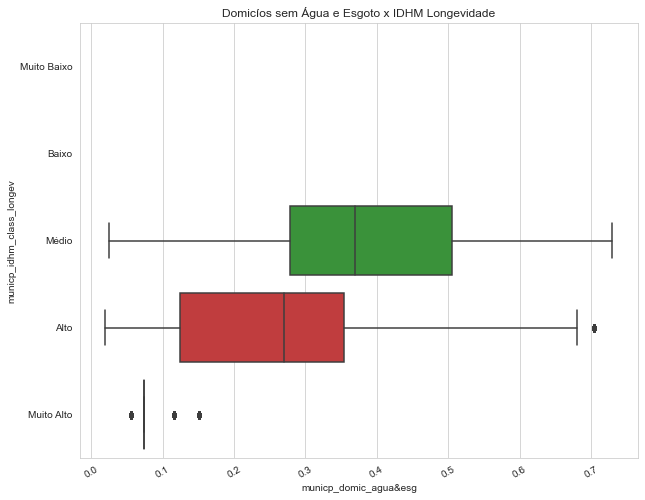

In [59]:
# Análise bivariada domicíos com água e esgoto x cobertura vacinal
plt.subplots(figsize=(10,8))

sns.boxplot(x=df_aed['municp_domic_agua&esg'], y=df_aed['municp_idhm_class_longev'])

plt.title('Domicíos sem Água e Esgoto x IDHM Longevidade')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

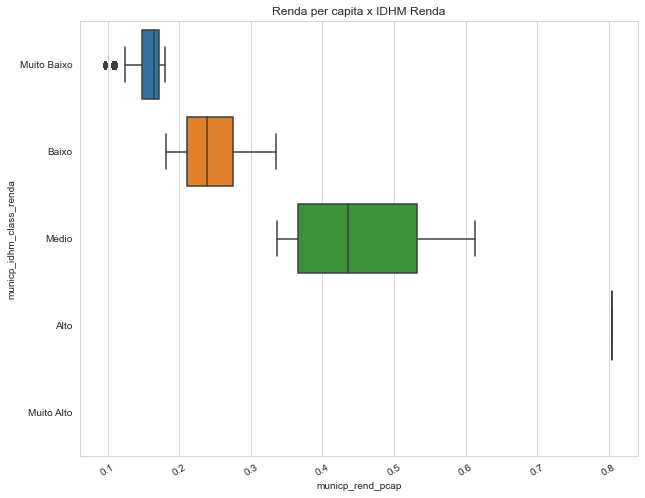

In [60]:
# Análise bivariada domicíos com água e esgoto x cobertura vacinal
plt.subplots(figsize=(10,8))

sns.boxplot(x=df_aed['municp_rend_pcap'], y=df_aed['municp_idhm_class_renda'])

plt.title('Renda per capita x IDHM Renda')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

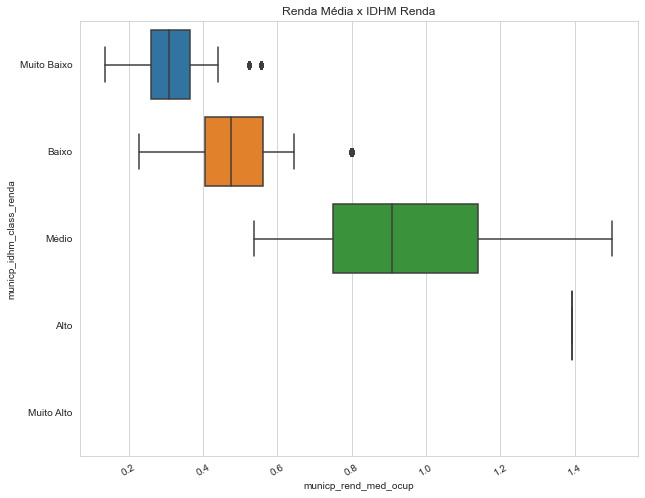

In [61]:
# Análise bivariada domicíos com água e esgoto x cobertura vacinal
plt.subplots(figsize=(10,8))

sns.boxplot(x=df_aed['municp_rend_med_ocup'], y=df_aed['municp_idhm_class_renda'])

plt.title('Renda Média x IDHM Renda')
#plt.ylabel(' ')
#plot.set_xlabel(' ')
plt.xticks(rotation=30)
#plt.legend(title=' ')
plt.show()

## 4.5 Análise Multivariada (matriz de correlação)

### 4.5.1 Indicadores de educação

In [62]:
# Verificando os indicadores socioeconômicos de educação
df_aed[['municp_idhm','municp_idhm_educ','municp_tx_analf','municp_niv_escol_pop']].describe()

,municp_idhm,municp_idhm_educ,municp_tx_analf,municp_niv_escol_pop
count,737003.000000,737003.000000,737003.000000,737003.000000
mean,0.628874,0.557906,0.228437,0.435874
std,0.078450,0.111330,0.107064,0.161220
min,0.443000,0.286000,0.049200,0.154000
25%,0.566000,0.475000,0.161800,0.311000
50%,0.609000,0.536000,0.241600,0.379000
75%,0.682000,0.615000,0.319800,0.488000
max,0.768000,0.752000,0.435300,0.735000


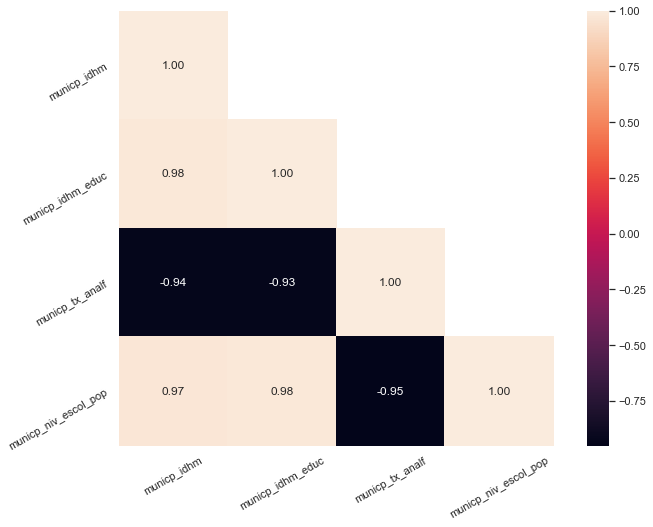

In [63]:
## verificando se existem colunas fortemente correlacionadas

plt.figure(figsize=(12,8))
corr = df_aed[['municp_idhm','municp_idhm_educ','municp_tx_analf','municp_niv_escol_pop']].corr()

sns.set_context('notebook', font_scale=1.0, rc={'lines.linewidth': 2.0})

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', square = True)

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=30)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

O índicador **municp_tx_analf** é inversamente correlacionado com o índice IDHM Educação 

### 4.5.2 Indicadores de saúde

In [64]:
# Verificando os indicadores socioeconômicos de saúde
df_aed[['municp_idhm','municp_idhm_longev','municp_mort_inf','municp_domic_agua','municp_domic_luz',
        'municp_domic_agua&esg']].describe()

,municp_idhm,municp_idhm_longev,municp_mort_inf,municp_domic_agua,municp_domic_luz,municp_domic_agua&esg
count,737003.000000,737003.000000,737003.000000,737003.000000,737003.000000,737003.000000
mean,0.628874,0.761193,0.275501,0.820834,0.961815,0.231796
std,0.078450,0.035149,0.067418,0.094691,0.048803,0.159153
min,0.443000,0.677000,0.181000,0.245900,0.574900,0.019400
25%,0.566000,0.737000,0.213000,0.763300,0.952700,0.074300
50%,0.609000,0.758000,0.278000,0.831800,0.975700,0.182500
75%,0.682000,0.790000,0.320000,0.894300,0.997000,0.343000
max,0.768000,0.813000,0.453000,0.977700,0.999300,0.730100


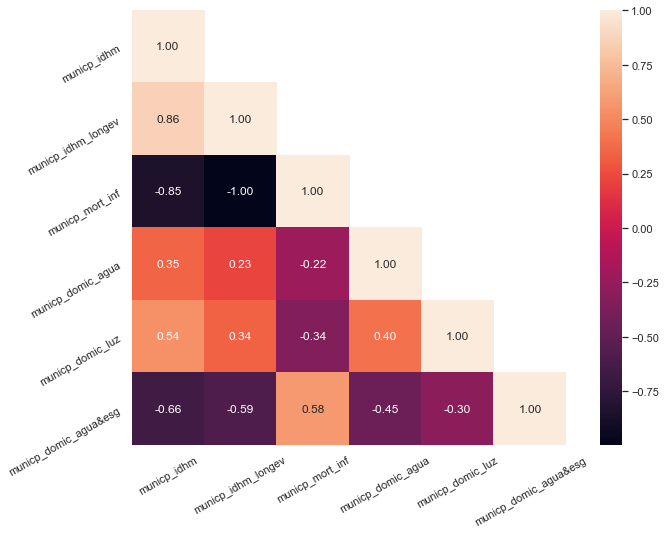

In [65]:
#verificando se existem colunas fortemente correlacionadas

plt.figure(figsize=(12,8))
corr = df_aed[['municp_idhm','municp_idhm_longev','municp_mort_inf','municp_domic_agua','municp_domic_luz',
               'municp_domic_agua&esg']].corr()
              
sns.set_context('notebook', font_scale=1.0, rc={'lines.linewidth': 2.0})

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', square = True)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=30)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Os índicadores **municp_mort_inf** e **municp_domic_agua&esg** são assimétricos à esquerda, apresentando correlação negativa com o índice IDHM Longevidade.

### 4.5.3 Indicadores de renda

In [66]:
# Verificando os indicadores socioeconômicos de renda
df_aed[['municp_idhm','municp_idhm_renda','municp_rend_med_ocup','municp_rend_pcap']].describe()

,municp_idhm,municp_idhm_renda,municp_rend_med_ocup,municp_rend_pcap
count,737003.000000,737003.000000,737003.000000,737003.000000
mean,0.628874,0.590240,0.693703,0.364898
std,0.078450,0.084617,0.367498,0.212006
min,0.443000,0.400000,0.136420,0.096250
25%,0.566000,0.525000,0.412150,0.210300
50%,0.609000,0.570000,0.560400,0.277190
75%,0.682000,0.643000,0.909170,0.438560
max,0.768000,0.741000,1.501640,0.805360


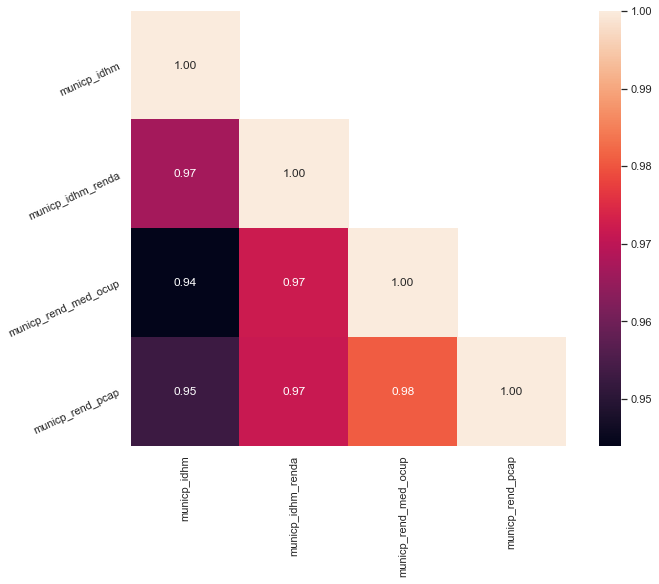

In [67]:
#verificando se existem colunas fortemente correlacionadas

plt.figure(figsize=(12,8))
corr = df_aed[['municp_idhm','municp_idhm_renda','municp_rend_med_ocup','municp_rend_pcap']].corr()

sns.set_context('notebook', font_scale=1.0, rc={'lines.linewidth': 2.0})

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', square = True)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=25)

Os indicadores **municp_rend_pcap** e **municp_rend_med_ocup** têm alta correlação com o índice IDHM Renda, como esperado.

O IDHM renda representa perfeitamente esta dimensão.

In [68]:
# Eliminando as colunas que apresentam forte correlação com os índices oficiais
df_aed.drop(columns=['municp_niv_escol_pop','municp_domic_agua','municp_domic_luz','municp_rend_pcap','municp_rend_med_ocup']
                        , axis=1, inplace=True)

In [70]:
# Exportação do dataset em formato csv
df_aed.to_csv('RegVacinaMA_AED.csv')